# Data Preprocessing

## Task 1: Import the Modules

In [48]:
library(ggplot2)
install.packages("ggthemes")
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(scales)
install.packages("DT")
library(DT)
install.packages("patchwork")
library(patchwork)
options(warn = -1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Task 2: Load the Data

In [18]:
apr <- read.csv('/data/notebook_files/uber-raw-data-apr14.csv')
may <- read.csv('/data/notebook_files/uber-raw-data-may14.csv')
june <- read.csv('/data/notebook_files/uber-raw-data-jun14.csv')
july <- read.csv('/data/notebook_files/uber-raw-data-jul14.csv')
aug <- read.csv('/data/notebook_files/uber-raw-data-aug14.csv')
sep <- read.csv('/data/notebook_files/uber-raw-data-sep14.csv')
dataset <- rbind(apr, may, june, july, aug, sep)

In [19]:
head(dataset)

,Date.Time,Lat,Lon,Base
,<chr>,<dbl>,<dbl>,<chr>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


## Task 3: Format the Data

In [20]:
dataset$Date.Time <- as.POSIXct(dataset$Date.Time, format = "%m/%d/%Y %H:%M:%S")
dataset$Time <- format(as.POSIXct(dataset$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
dataset$Date.Time <- ymd_hms(dataset$Date.Time)
dataset$day <- factor(day(dataset$Date.Time))
dataset$month <- factor(month(dataset$Date.Time, label = TRUE))
dataset$year <- factor(year(dataset$Date.Time))
dataset$dayofweek <- factor(wday(dataset$Date.Time, label = TRUE))
dataset$hour <- factor(hour(hms(dataset$Time)))
dataset$minute <- factor(minute(hms(dataset$Time)))
dataset$second <- factor(second(hms(dataset$Time)))

In [21]:
head(dataset)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,Apr,2014,Tue,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,Apr,2014,Tue,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,Apr,2014,Tue,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,Apr,2014,Tue,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,Apr,2014,Tue,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,Apr,2014,Tue,0,33,0


# Monthly Data Analysis

## Task 4: Get the Monthly Data

In [22]:
month_data = dataset %>% group_by(month)
month_data = month_data %>% dplyr::summarize(trip_count = n())
datatable(month_data)

<!doctype html>
 
 
 
 
<link href="data:text/css;charset-utf-8;base64,LmR0LWNyb3NzdGFsay1mYWRlIHsKICBvcGFjaXR5OiAwLjI7Cn0KCmh0bWwgYm9keSBkaXYuRFRTIGRpdi5kYXRhVGFibGVzX3Njcm9sbEJvZHkgewogIGJhY2tncm91bmQ6IG5vbmU7Cn0KCgovKgpGaXggaHR0cHM6Ly9naXRodWIuY29tL3JzdHVkaW8vRFQvaXNzdWVzLzU2MwpJZiB0aGUgYHRhYmxlLmRpc3BsYXlgIGlzIHNldCB0byAiYmxvY2siIChlLmcuLCBwa2dkb3duKSwgdGhlIGJyb3dzZXIgd2lsbCBkaXNwbGF5CmRhdGF0YWJsZSBvYmplY3RzIHN0cmFuZ2VseS4gVGhlIHNlYXJjaCBwYW5lbCBhbmQgdGhlIHBhZ2UgYnV0dG9ucyB3aWxsIHN0aWxsIGJlCmluIGZ1bGwtd2lkdGggYnV0IHRoZSB0YWJsZSBib2R5IHdpbGwgYmUgImNvbXBhY3QiIGFuZCBzaG9ydGVyLgpJbiB0aGVyb3J5LCBoYXZpbmcgdGhpcyBhdHRyaWJ1dGVzIHdpbGwgYWZmZWN0IGBkb209InQiYAp3aXRoIGBkaXNwbGF5OiBibG9ja2AgdXNlcnMuIEJ1dCBpbiByZWFsaXR5LCB0aGVyZSBzaG91bGQgYmUgbm8gb25lLgpXZSBtYXkgcmVtb3ZlIHRoZSBiZWxvdyBsaW5lcyBpbiB0aGUgZnV0dXJlIGlmIHRoZSB1cHN0cmVhbSBhZ3JlZSB0byBoYXZlIHRoaXMgdGhlcmUuClNlZSBodHRwczovL2dpdGh1Yi5jb20vRGF0YVRhYmxlcy9EYXRhVGFibGVzU3JjL2lzc3Vlcy8xNjAKKi8KCnRhYmxlLmRhdGFUYWJsZSB7CiAgZGlzcGxheTogdGFibGU7Cn0KCgovKgpXaGVuIERUT3V0cHV0KGZpbGwgPSBUUlVFKSwgaXQgcmVjZWl2ZXMgYSAuaHRtbC1maWxsLWl0ZW0gY2xhc3MgKHZpYSBodG1sdG9vbHM6OmJpbmRGaWxsUm9sZSgpKSwgd2hpY2ggZWZmZWN0aXZlbHkgYW1vdW50cyB0byBgZmxleDogMSAxIGF1dG9gLiBUaGF0J3MgbW9zdGx5IGZpbmUsIGJ1dCB0aGUgY2FzZSB3aGVyZSBgZmlsbENvbnRhaW5lcj1UUlVFYCtgaGVpZ2h0OmF1dG9gK2BmbGV4LWJhc2lzOmF1dG9gIGFuZCB0aGUgY29udGFpbmVyIChlLmcuLCBhIGJzbGliOjpjYXJkKCkpIGRvZXNuJ3QgaGF2ZSBhIGRlZmluZWQgaGVpZ2h0IGlzIGEgYml0IHByb2JsZW1hdGljIHNpbmNlIHRoZSB0YWJsZSB3YW50cyB0byBmaXQgdGhlIHBhcmVudCBidXQgdGhlIHBhcmVudCB3YW50cyB0byBmaXQgdGhlIHRhYmxlLCB3aGljaCByZXN1bHRzIHByZXR0eSBzbWFsbCB0YWJsZSBoZWlnaHQgKG1heWJlIGJlY2F1c2UgdGhlcmUgaXMgYSBtaW5pbXVtIGhlaWdodCBzb21ld2hlcmU/KS4gSXQgc2VlbXMgYmV0dGVyIGluIHRoaXMgY2FzZSB0byBpbXBvc2UgYSA0MDBweCBoZWlnaHQgZGVmYXVsdCBmb3IgdGhlIHRhYmxlLCB3aGljaCB3ZSBjYW4gZG8gYnkgc2V0dGluZyBgZmxleC1iYXNpc2AgdG8gNDAwcHggKHRoZSB0YWJsZSBpcyBzdGlsbCBhbGxvd2VkIHRvIGdyb3cvc2hyaW5rIHdoZW4gdGhlIGNvbnRhaW5lciBoYXMgYW4gb3BpbmlvbmF0ZWQgaGVpZ2h0KS4KKi8KCi5odG1sLWZpbGwtY29udGFpbmVyID4gLmh0bWwtZmlsbC1pdGVtLmRhdGF0YWJsZXMgewogIGZsZXgtYmFzaXM6IDQwMHB4Owp9Cg==" rel="stylesheet" />

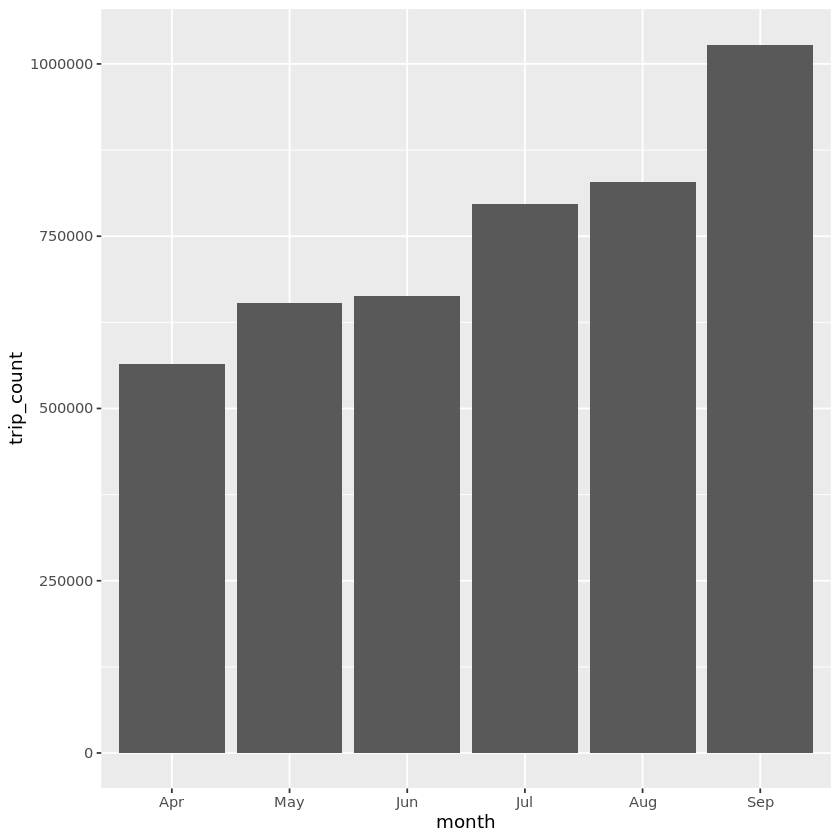

In [23]:
ggplot(month_data , aes(month, trip_count)) + geom_bar( stat = "identity")

## Task 5: Get the Trips Data of the Week Days

In [24]:
day_month_data = dataset %>% group_by(month, dayofweek)
day_month_data = day_month_data %>% dplyr::summarize(trip_count = n())
datatable(day_month_data)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


<!doctype html>
 
 
 
 
<link href="data:text/css;charset-utf-8;base64,LmR0LWNyb3NzdGFsay1mYWRlIHsKICBvcGFjaXR5OiAwLjI7Cn0KCmh0bWwgYm9keSBkaXYuRFRTIGRpdi5kYXRhVGFibGVzX3Njcm9sbEJvZHkgewogIGJhY2tncm91bmQ6IG5vbmU7Cn0KCgovKgpGaXggaHR0cHM6Ly9naXRodWIuY29tL3JzdHVkaW8vRFQvaXNzdWVzLzU2MwpJZiB0aGUgYHRhYmxlLmRpc3BsYXlgIGlzIHNldCB0byAiYmxvY2siIChlLmcuLCBwa2dkb3duKSwgdGhlIGJyb3dzZXIgd2lsbCBkaXNwbGF5CmRhdGF0YWJsZSBvYmplY3RzIHN0cmFuZ2VseS4gVGhlIHNlYXJjaCBwYW5lbCBhbmQgdGhlIHBhZ2UgYnV0dG9ucyB3aWxsIHN0aWxsIGJlCmluIGZ1bGwtd2lkdGggYnV0IHRoZSB0YWJsZSBib2R5IHdpbGwgYmUgImNvbXBhY3QiIGFuZCBzaG9ydGVyLgpJbiB0aGVyb3J5LCBoYXZpbmcgdGhpcyBhdHRyaWJ1dGVzIHdpbGwgYWZmZWN0IGBkb209InQiYAp3aXRoIGBkaXNwbGF5OiBibG9ja2AgdXNlcnMuIEJ1dCBpbiByZWFsaXR5LCB0aGVyZSBzaG91bGQgYmUgbm8gb25lLgpXZSBtYXkgcmVtb3ZlIHRoZSBiZWxvdyBsaW5lcyBpbiB0aGUgZnV0dXJlIGlmIHRoZSB1cHN0cmVhbSBhZ3JlZSB0byBoYXZlIHRoaXMgdGhlcmUuClNlZSBodHRwczovL2dpdGh1Yi5jb20vRGF0YVRhYmxlcy9EYXRhVGFibGVzU3JjL2lzc3Vlcy8xNjAKKi8KCnRhYmxlLmRhdGFUYWJsZSB7CiAgZGlzcGxheTogdGFibGU7Cn0KCgovKgpXaGVuIERUT3V0cHV0KGZpbGwgPSBUUlVFKSwgaXQgcmVjZWl2ZXMgYSAuaHRtbC1maWxsLWl0ZW0gY2xhc3MgKHZpYSBodG1sdG9vbHM6OmJpbmRGaWxsUm9sZSgpKSwgd2hpY2ggZWZmZWN0aXZlbHkgYW1vdW50cyB0byBgZmxleDogMSAxIGF1dG9gLiBUaGF0J3MgbW9zdGx5IGZpbmUsIGJ1dCB0aGUgY2FzZSB3aGVyZSBgZmlsbENvbnRhaW5lcj1UUlVFYCtgaGVpZ2h0OmF1dG9gK2BmbGV4LWJhc2lzOmF1dG9gIGFuZCB0aGUgY29udGFpbmVyIChlLmcuLCBhIGJzbGliOjpjYXJkKCkpIGRvZXNuJ3QgaGF2ZSBhIGRlZmluZWQgaGVpZ2h0IGlzIGEgYml0IHByb2JsZW1hdGljIHNpbmNlIHRoZSB0YWJsZSB3YW50cyB0byBmaXQgdGhlIHBhcmVudCBidXQgdGhlIHBhcmVudCB3YW50cyB0byBmaXQgdGhlIHRhYmxlLCB3aGljaCByZXN1bHRzIHByZXR0eSBzbWFsbCB0YWJsZSBoZWlnaHQgKG1heWJlIGJlY2F1c2UgdGhlcmUgaXMgYSBtaW5pbXVtIGhlaWdodCBzb21ld2hlcmU/KS4gSXQgc2VlbXMgYmV0dGVyIGluIHRoaXMgY2FzZSB0byBpbXBvc2UgYSA0MDBweCBoZWlnaHQgZGVmYXVsdCBmb3IgdGhlIHRhYmxlLCB3aGljaCB3ZSBjYW4gZG8gYnkgc2V0dGluZyBgZmxleC1iYXNpc2AgdG8gNDAwcHggKHRoZSB0YWJsZSBpcyBzdGlsbCBhbGxvd2VkIHRvIGdyb3cvc2hyaW5rIHdoZW4gdGhlIGNvbnRhaW5lciBoYXMgYW4gb3BpbmlvbmF0ZWQgaGVpZ2h0KS4KKi8KCi5odG1sLWZpbGwtY29udGFpbmVyID4gLmh0bWwtZmlsbC1pdGVtLmRhdGF0YWJsZXMgewogIGZsZXgtYmFzaXM6IDQwMHB4Owp9Cg==" rel="stylesheet" />

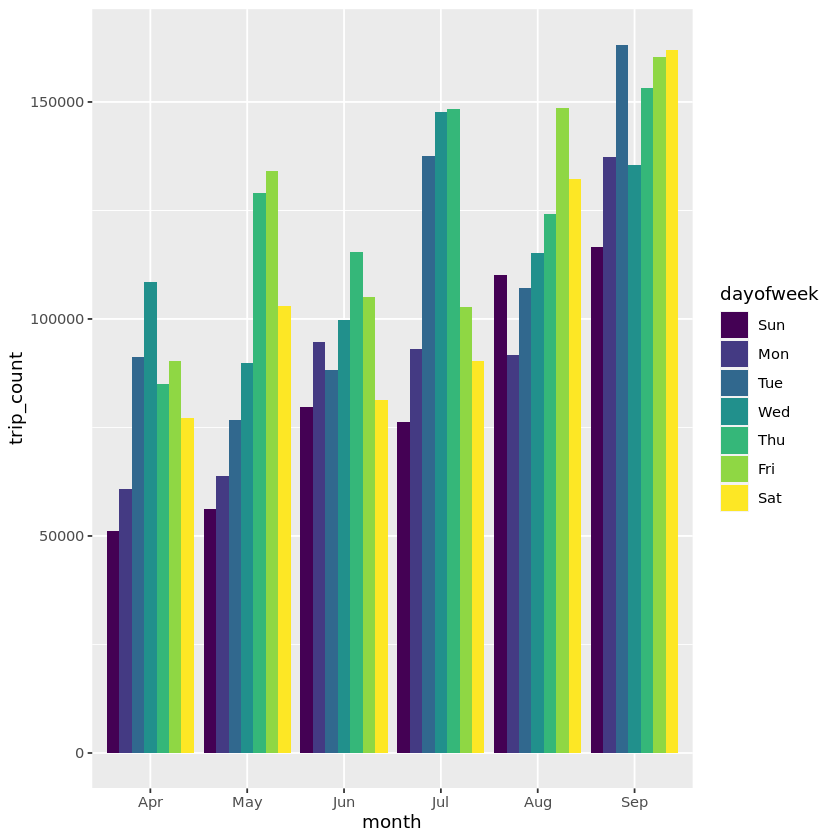

In [25]:
ggplot(day_month_data, aes(month, trip_count, fill=dayofweek)) + geom_bar(stat = "identity", position="dodge")

## Task 6: Add Colors and Title

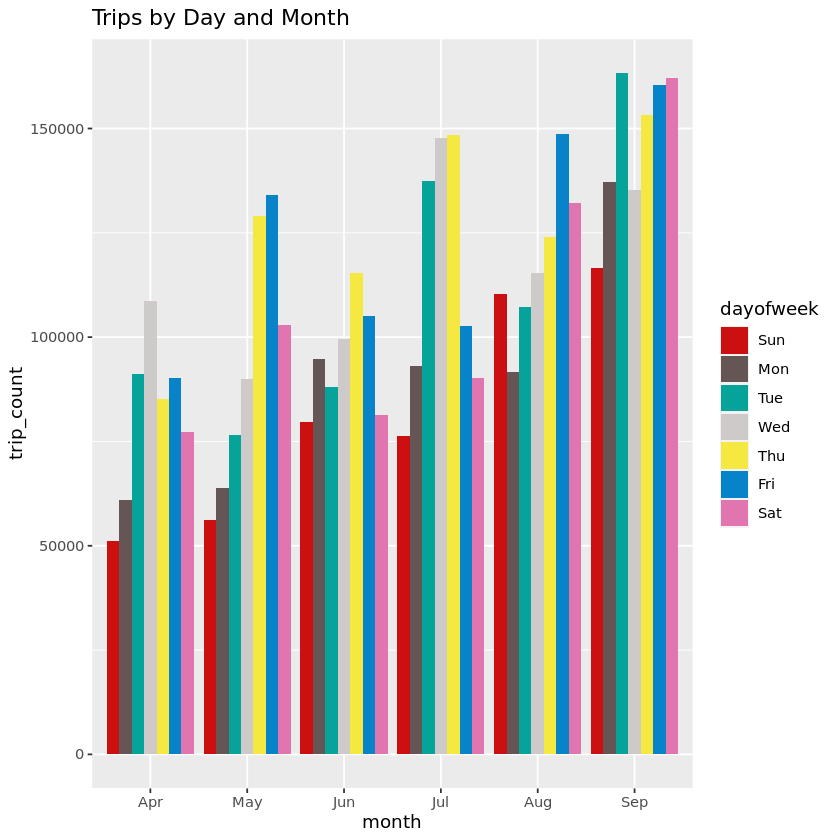

In [26]:
colors = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")
ggplot(day_month_data, aes(month, trip_count, fill=dayofweek)) + 
    geom_bar(stat = "identity", position="dodge") + 
    ggtitle("Trips by Day and Month") + 
    scale_fill_manual(values=colors)

## Task 7: Get the Trips by Bases on Each Month

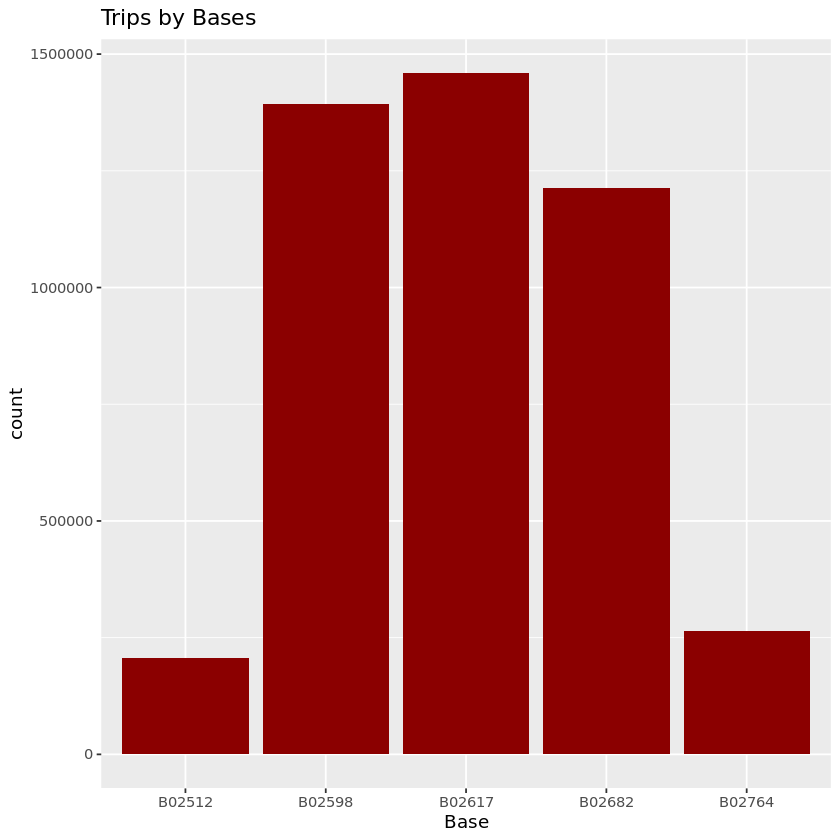

In [27]:
ggplot(dataset, aes(Base)) + geom_bar(fill = "darkred") + ggtitle("Trips by Bases")

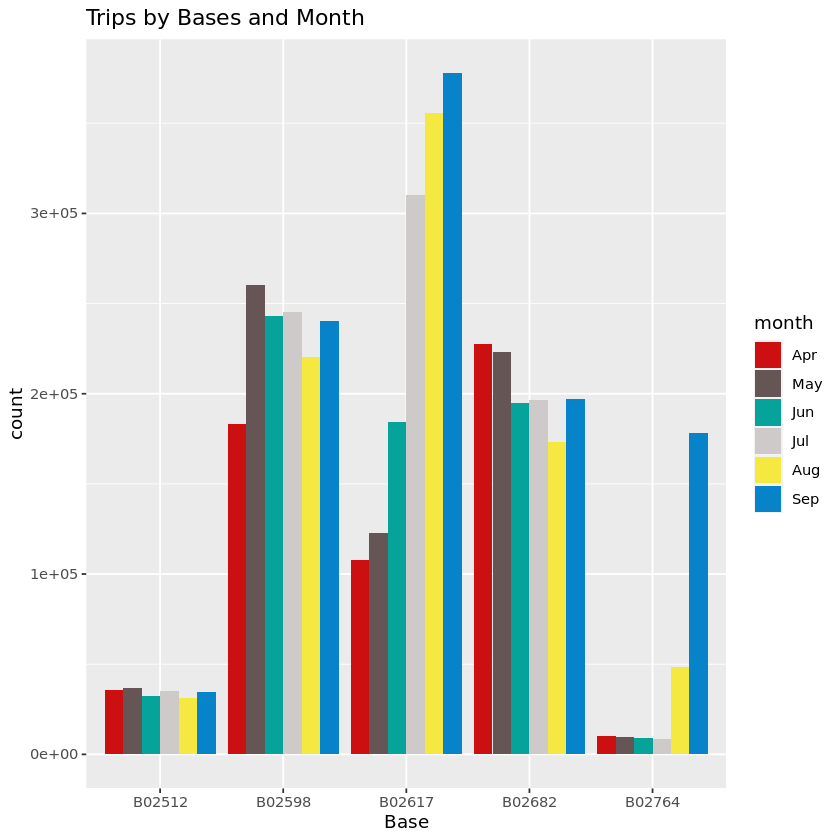

In [28]:
ggplot(dataset, aes(Base, fill = month)) + geom_bar(position = "dodge") + ggtitle("Trips by Bases and Month") + scale_fill_manual(values = colors)

## Task 8: Plot the Trips on Each Day of Week from the Base

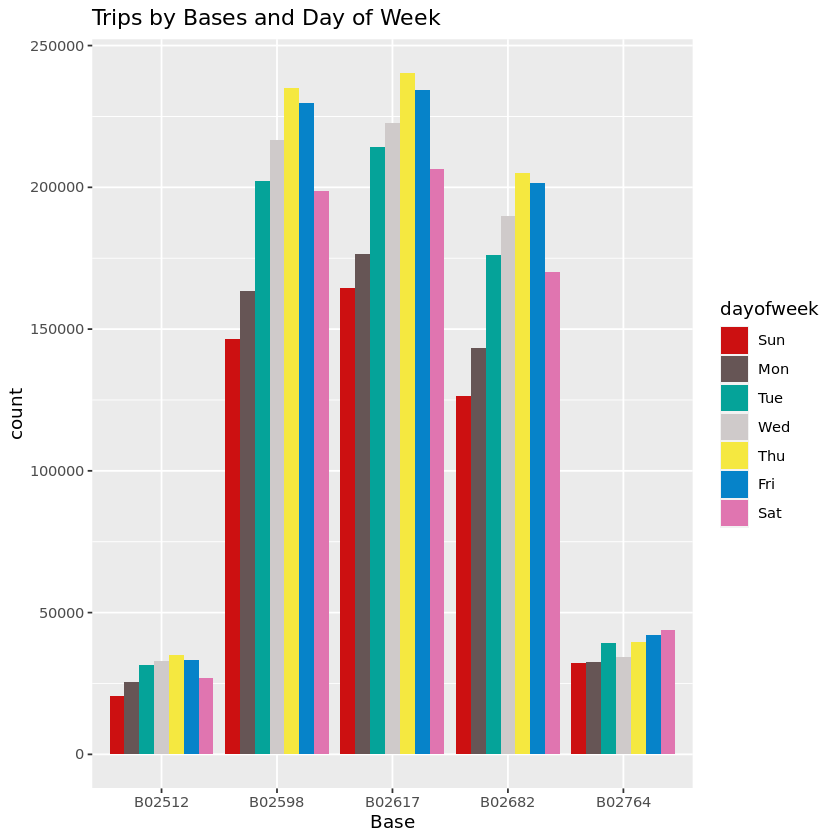

In [29]:
ggplot(dataset, aes(Base, fill = dayofweek)) + geom_bar(position = "dodge") + ggtitle("Trips by Bases and Day of Week") + scale_fill_manual(values = colors)

# Daily Data Analysis

## Task 9: Get the Hourly Trips

In [30]:
hourly_data = dataset %>% group_by(hour)
hourly_data = hourly_data %>% dplyr::summarize(trip_count = n())
datatable(hourly_data)

<!doctype html>
 
 
 
 
<link href="data:text/css;charset-utf-8;base64,LmR0LWNyb3NzdGFsay1mYWRlIHsKICBvcGFjaXR5OiAwLjI7Cn0KCmh0bWwgYm9keSBkaXYuRFRTIGRpdi5kYXRhVGFibGVzX3Njcm9sbEJvZHkgewogIGJhY2tncm91bmQ6IG5vbmU7Cn0KCgovKgpGaXggaHR0cHM6Ly9naXRodWIuY29tL3JzdHVkaW8vRFQvaXNzdWVzLzU2MwpJZiB0aGUgYHRhYmxlLmRpc3BsYXlgIGlzIHNldCB0byAiYmxvY2siIChlLmcuLCBwa2dkb3duKSwgdGhlIGJyb3dzZXIgd2lsbCBkaXNwbGF5CmRhdGF0YWJsZSBvYmplY3RzIHN0cmFuZ2VseS4gVGhlIHNlYXJjaCBwYW5lbCBhbmQgdGhlIHBhZ2UgYnV0dG9ucyB3aWxsIHN0aWxsIGJlCmluIGZ1bGwtd2lkdGggYnV0IHRoZSB0YWJsZSBib2R5IHdpbGwgYmUgImNvbXBhY3QiIGFuZCBzaG9ydGVyLgpJbiB0aGVyb3J5LCBoYXZpbmcgdGhpcyBhdHRyaWJ1dGVzIHdpbGwgYWZmZWN0IGBkb209InQiYAp3aXRoIGBkaXNwbGF5OiBibG9ja2AgdXNlcnMuIEJ1dCBpbiByZWFsaXR5LCB0aGVyZSBzaG91bGQgYmUgbm8gb25lLgpXZSBtYXkgcmVtb3ZlIHRoZSBiZWxvdyBsaW5lcyBpbiB0aGUgZnV0dXJlIGlmIHRoZSB1cHN0cmVhbSBhZ3JlZSB0byBoYXZlIHRoaXMgdGhlcmUuClNlZSBodHRwczovL2dpdGh1Yi5jb20vRGF0YVRhYmxlcy9EYXRhVGFibGVzU3JjL2lzc3Vlcy8xNjAKKi8KCnRhYmxlLmRhdGFUYWJsZSB7CiAgZGlzcGxheTogdGFibGU7Cn0KCgovKgpXaGVuIERUT3V0cHV0KGZpbGwgPSBUUlVFKSwgaXQgcmVjZWl2ZXMgYSAuaHRtbC1maWxsLWl0ZW0gY2xhc3MgKHZpYSBodG1sdG9vbHM6OmJpbmRGaWxsUm9sZSgpKSwgd2hpY2ggZWZmZWN0aXZlbHkgYW1vdW50cyB0byBgZmxleDogMSAxIGF1dG9gLiBUaGF0J3MgbW9zdGx5IGZpbmUsIGJ1dCB0aGUgY2FzZSB3aGVyZSBgZmlsbENvbnRhaW5lcj1UUlVFYCtgaGVpZ2h0OmF1dG9gK2BmbGV4LWJhc2lzOmF1dG9gIGFuZCB0aGUgY29udGFpbmVyIChlLmcuLCBhIGJzbGliOjpjYXJkKCkpIGRvZXNuJ3QgaGF2ZSBhIGRlZmluZWQgaGVpZ2h0IGlzIGEgYml0IHByb2JsZW1hdGljIHNpbmNlIHRoZSB0YWJsZSB3YW50cyB0byBmaXQgdGhlIHBhcmVudCBidXQgdGhlIHBhcmVudCB3YW50cyB0byBmaXQgdGhlIHRhYmxlLCB3aGljaCByZXN1bHRzIHByZXR0eSBzbWFsbCB0YWJsZSBoZWlnaHQgKG1heWJlIGJlY2F1c2UgdGhlcmUgaXMgYSBtaW5pbXVtIGhlaWdodCBzb21ld2hlcmU/KS4gSXQgc2VlbXMgYmV0dGVyIGluIHRoaXMgY2FzZSB0byBpbXBvc2UgYSA0MDBweCBoZWlnaHQgZGVmYXVsdCBmb3IgdGhlIHRhYmxlLCB3aGljaCB3ZSBjYW4gZG8gYnkgc2V0dGluZyBgZmxleC1iYXNpc2AgdG8gNDAwcHggKHRoZSB0YWJsZSBpcyBzdGlsbCBhbGxvd2VkIHRvIGdyb3cvc2hyaW5rIHdoZW4gdGhlIGNvbnRhaW5lciBoYXMgYW4gb3BpbmlvbmF0ZWQgaGVpZ2h0KS4KKi8KCi5odG1sLWZpbGwtY29udGFpbmVyID4gLmh0bWwtZmlsbC1pdGVtLmRhdGF0YWJsZXMgewogIGZsZXgtYmFzaXM6IDQwMHB4Owp9Cg==" rel="stylesheet" />

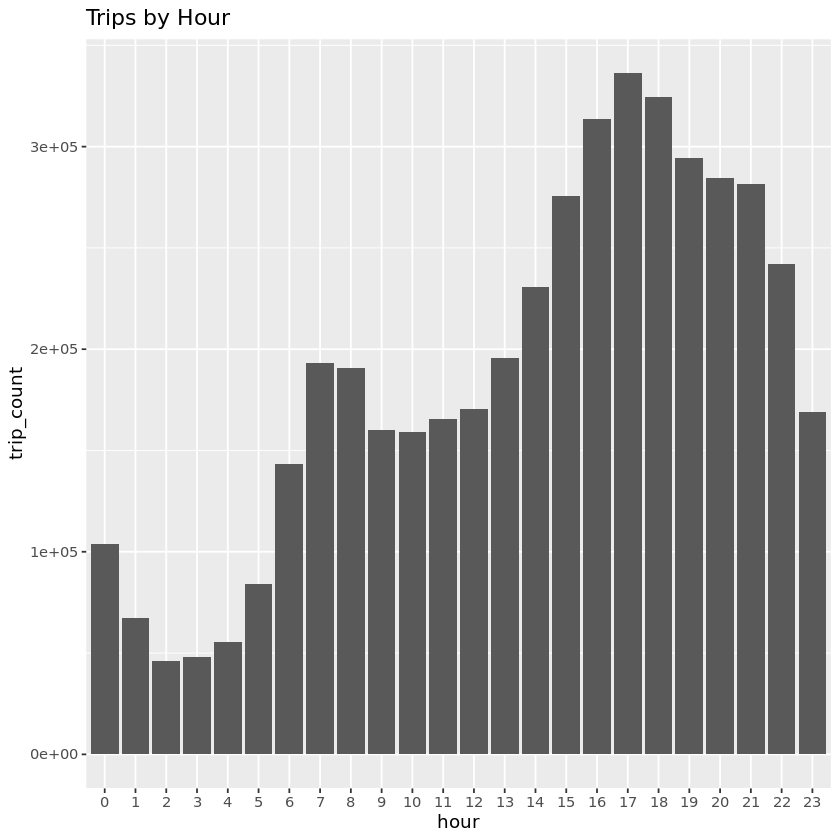

In [31]:
ggplot(hourly_data, aes(hour, trip_count)) + geom_bar(stat = "identity") + ggtitle("Trips by Hour")

## Task 10: Get the Hourly Trips with Months and Days of Week

In [32]:
hourly_monthly_data = dataset %>% group_by(hour, month)
hourly_monthly_data = hourly_monthly_data %>% dplyr::summarize(trip_count = n())
hourly_day_data = dataset %>% group_by(hour, day)
hourly_day_data = hourly_day_data %>% dplyr:: summarize(trip_count = n())

`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'hour'. You can override using the
`.groups` argument.


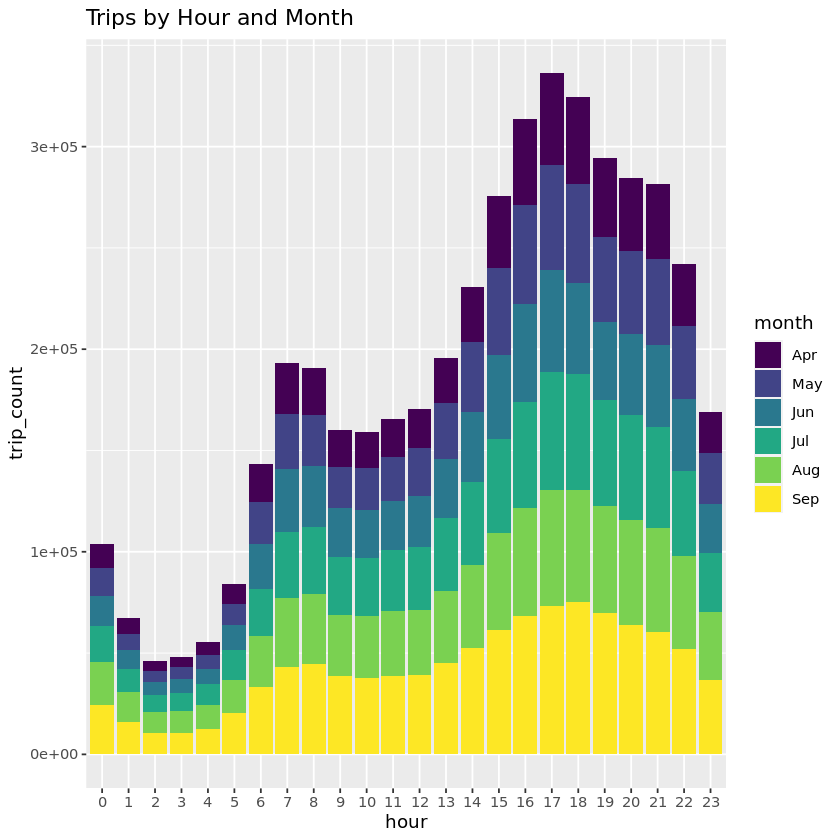

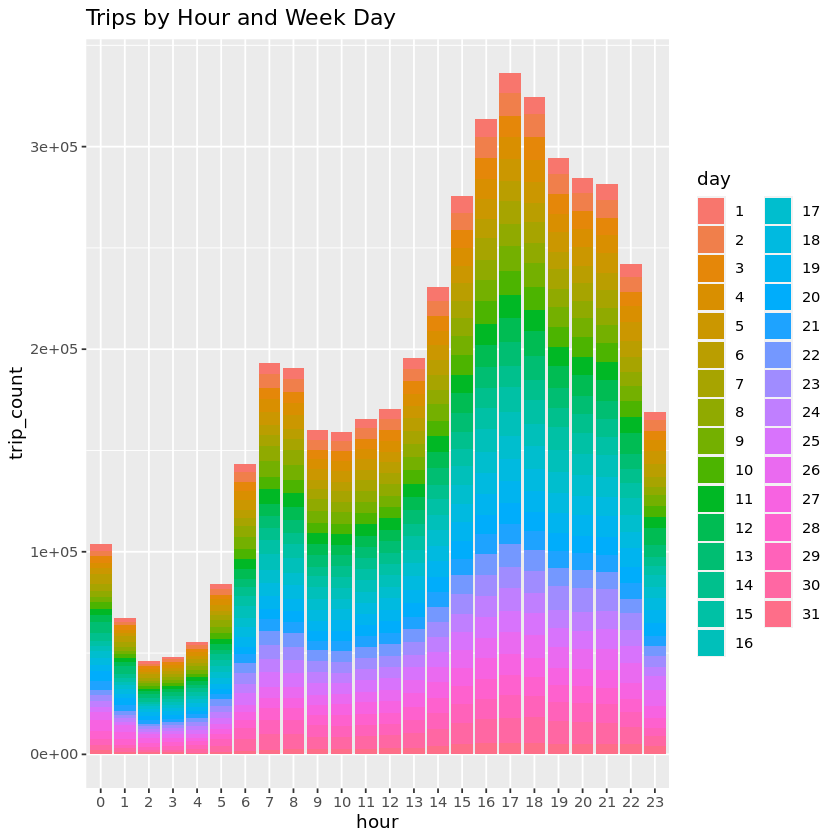

In [33]:
ggplot(hourly_monthly_data, aes(hour, trip_count, fill = month)) + geom_bar( stat = "identity") + ggtitle("Trips by Hour and Month")
ggplot(hourly_day_data, aes(hour, trip_count, fill = day)) + geom_bar( stat = "identity") + ggtitle("Trips by Hour and Week Day")

## Task 11: Get the Trips on Each Day of Month

In [34]:
day_data = dataset %>% group_by(day)
day_data = day_data %>% dplyr::summarize(trip_count = n())
datatable(day_data)

<!doctype html>
 
 
 
 
<link href="data:text/css;charset-utf-8;base64,LmR0LWNyb3NzdGFsay1mYWRlIHsKICBvcGFjaXR5OiAwLjI7Cn0KCmh0bWwgYm9keSBkaXYuRFRTIGRpdi5kYXRhVGFibGVzX3Njcm9sbEJvZHkgewogIGJhY2tncm91bmQ6IG5vbmU7Cn0KCgovKgpGaXggaHR0cHM6Ly9naXRodWIuY29tL3JzdHVkaW8vRFQvaXNzdWVzLzU2MwpJZiB0aGUgYHRhYmxlLmRpc3BsYXlgIGlzIHNldCB0byAiYmxvY2siIChlLmcuLCBwa2dkb3duKSwgdGhlIGJyb3dzZXIgd2lsbCBkaXNwbGF5CmRhdGF0YWJsZSBvYmplY3RzIHN0cmFuZ2VseS4gVGhlIHNlYXJjaCBwYW5lbCBhbmQgdGhlIHBhZ2UgYnV0dG9ucyB3aWxsIHN0aWxsIGJlCmluIGZ1bGwtd2lkdGggYnV0IHRoZSB0YWJsZSBib2R5IHdpbGwgYmUgImNvbXBhY3QiIGFuZCBzaG9ydGVyLgpJbiB0aGVyb3J5LCBoYXZpbmcgdGhpcyBhdHRyaWJ1dGVzIHdpbGwgYWZmZWN0IGBkb209InQiYAp3aXRoIGBkaXNwbGF5OiBibG9ja2AgdXNlcnMuIEJ1dCBpbiByZWFsaXR5LCB0aGVyZSBzaG91bGQgYmUgbm8gb25lLgpXZSBtYXkgcmVtb3ZlIHRoZSBiZWxvdyBsaW5lcyBpbiB0aGUgZnV0dXJlIGlmIHRoZSB1cHN0cmVhbSBhZ3JlZSB0byBoYXZlIHRoaXMgdGhlcmUuClNlZSBodHRwczovL2dpdGh1Yi5jb20vRGF0YVRhYmxlcy9EYXRhVGFibGVzU3JjL2lzc3Vlcy8xNjAKKi8KCnRhYmxlLmRhdGFUYWJsZSB7CiAgZGlzcGxheTogdGFibGU7Cn0KCgovKgpXaGVuIERUT3V0cHV0KGZpbGwgPSBUUlVFKSwgaXQgcmVjZWl2ZXMgYSAuaHRtbC1maWxsLWl0ZW0gY2xhc3MgKHZpYSBodG1sdG9vbHM6OmJpbmRGaWxsUm9sZSgpKSwgd2hpY2ggZWZmZWN0aXZlbHkgYW1vdW50cyB0byBgZmxleDogMSAxIGF1dG9gLiBUaGF0J3MgbW9zdGx5IGZpbmUsIGJ1dCB0aGUgY2FzZSB3aGVyZSBgZmlsbENvbnRhaW5lcj1UUlVFYCtgaGVpZ2h0OmF1dG9gK2BmbGV4LWJhc2lzOmF1dG9gIGFuZCB0aGUgY29udGFpbmVyIChlLmcuLCBhIGJzbGliOjpjYXJkKCkpIGRvZXNuJ3QgaGF2ZSBhIGRlZmluZWQgaGVpZ2h0IGlzIGEgYml0IHByb2JsZW1hdGljIHNpbmNlIHRoZSB0YWJsZSB3YW50cyB0byBmaXQgdGhlIHBhcmVudCBidXQgdGhlIHBhcmVudCB3YW50cyB0byBmaXQgdGhlIHRhYmxlLCB3aGljaCByZXN1bHRzIHByZXR0eSBzbWFsbCB0YWJsZSBoZWlnaHQgKG1heWJlIGJlY2F1c2UgdGhlcmUgaXMgYSBtaW5pbXVtIGhlaWdodCBzb21ld2hlcmU/KS4gSXQgc2VlbXMgYmV0dGVyIGluIHRoaXMgY2FzZSB0byBpbXBvc2UgYSA0MDBweCBoZWlnaHQgZGVmYXVsdCBmb3IgdGhlIHRhYmxlLCB3aGljaCB3ZSBjYW4gZG8gYnkgc2V0dGluZyBgZmxleC1iYXNpc2AgdG8gNDAwcHggKHRoZSB0YWJsZSBpcyBzdGlsbCBhbGxvd2VkIHRvIGdyb3cvc2hyaW5rIHdoZW4gdGhlIGNvbnRhaW5lciBoYXMgYW4gb3BpbmlvbmF0ZWQgaGVpZ2h0KS4KKi8KCi5odG1sLWZpbGwtY29udGFpbmVyID4gLmh0bWwtZmlsbC1pdGVtLmRhdGF0YWJsZXMgewogIGZsZXgtYmFzaXM6IDQwMHB4Owp9Cg==" rel="stylesheet" />

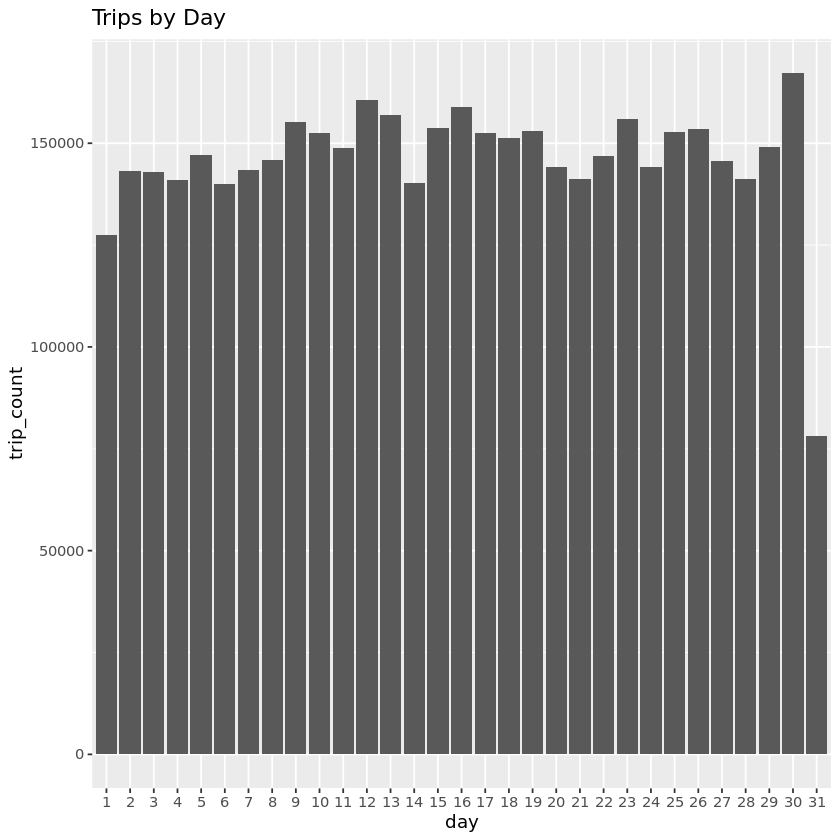

In [35]:
ggplot(day_data, aes(day, trip_count)) + geom_bar(stat = "identity") + ggtitle("Trips by Day")

## Task 12: Plot the Trips on Each Day with Months

In [36]:
month_day_data = dataset %>% group_by(month, day)
month_day_data = month_day_data %>% dplyr::summarize(trip_count = n())
datatable(month_day_data)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


<!doctype html>
 
 
 
 
<link href="data:text/css;charset-utf-8;base64,LmR0LWNyb3NzdGFsay1mYWRlIHsKICBvcGFjaXR5OiAwLjI7Cn0KCmh0bWwgYm9keSBkaXYuRFRTIGRpdi5kYXRhVGFibGVzX3Njcm9sbEJvZHkgewogIGJhY2tncm91bmQ6IG5vbmU7Cn0KCgovKgpGaXggaHR0cHM6Ly9naXRodWIuY29tL3JzdHVkaW8vRFQvaXNzdWVzLzU2MwpJZiB0aGUgYHRhYmxlLmRpc3BsYXlgIGlzIHNldCB0byAiYmxvY2siIChlLmcuLCBwa2dkb3duKSwgdGhlIGJyb3dzZXIgd2lsbCBkaXNwbGF5CmRhdGF0YWJsZSBvYmplY3RzIHN0cmFuZ2VseS4gVGhlIHNlYXJjaCBwYW5lbCBhbmQgdGhlIHBhZ2UgYnV0dG9ucyB3aWxsIHN0aWxsIGJlCmluIGZ1bGwtd2lkdGggYnV0IHRoZSB0YWJsZSBib2R5IHdpbGwgYmUgImNvbXBhY3QiIGFuZCBzaG9ydGVyLgpJbiB0aGVyb3J5LCBoYXZpbmcgdGhpcyBhdHRyaWJ1dGVzIHdpbGwgYWZmZWN0IGBkb209InQiYAp3aXRoIGBkaXNwbGF5OiBibG9ja2AgdXNlcnMuIEJ1dCBpbiByZWFsaXR5LCB0aGVyZSBzaG91bGQgYmUgbm8gb25lLgpXZSBtYXkgcmVtb3ZlIHRoZSBiZWxvdyBsaW5lcyBpbiB0aGUgZnV0dXJlIGlmIHRoZSB1cHN0cmVhbSBhZ3JlZSB0byBoYXZlIHRoaXMgdGhlcmUuClNlZSBodHRwczovL2dpdGh1Yi5jb20vRGF0YVRhYmxlcy9EYXRhVGFibGVzU3JjL2lzc3Vlcy8xNjAKKi8KCnRhYmxlLmRhdGFUYWJsZSB7CiAgZGlzcGxheTogdGFibGU7Cn0KCgovKgpXaGVuIERUT3V0cHV0KGZpbGwgPSBUUlVFKSwgaXQgcmVjZWl2ZXMgYSAuaHRtbC1maWxsLWl0ZW0gY2xhc3MgKHZpYSBodG1sdG9vbHM6OmJpbmRGaWxsUm9sZSgpKSwgd2hpY2ggZWZmZWN0aXZlbHkgYW1vdW50cyB0byBgZmxleDogMSAxIGF1dG9gLiBUaGF0J3MgbW9zdGx5IGZpbmUsIGJ1dCB0aGUgY2FzZSB3aGVyZSBgZmlsbENvbnRhaW5lcj1UUlVFYCtgaGVpZ2h0OmF1dG9gK2BmbGV4LWJhc2lzOmF1dG9gIGFuZCB0aGUgY29udGFpbmVyIChlLmcuLCBhIGJzbGliOjpjYXJkKCkpIGRvZXNuJ3QgaGF2ZSBhIGRlZmluZWQgaGVpZ2h0IGlzIGEgYml0IHByb2JsZW1hdGljIHNpbmNlIHRoZSB0YWJsZSB3YW50cyB0byBmaXQgdGhlIHBhcmVudCBidXQgdGhlIHBhcmVudCB3YW50cyB0byBmaXQgdGhlIHRhYmxlLCB3aGljaCByZXN1bHRzIHByZXR0eSBzbWFsbCB0YWJsZSBoZWlnaHQgKG1heWJlIGJlY2F1c2UgdGhlcmUgaXMgYSBtaW5pbXVtIGhlaWdodCBzb21ld2hlcmU/KS4gSXQgc2VlbXMgYmV0dGVyIGluIHRoaXMgY2FzZSB0byBpbXBvc2UgYSA0MDBweCBoZWlnaHQgZGVmYXVsdCBmb3IgdGhlIHRhYmxlLCB3aGljaCB3ZSBjYW4gZG8gYnkgc2V0dGluZyBgZmxleC1iYXNpc2AgdG8gNDAwcHggKHRoZSB0YWJsZSBpcyBzdGlsbCBhbGxvd2VkIHRvIGdyb3cvc2hyaW5rIHdoZW4gdGhlIGNvbnRhaW5lciBoYXMgYW4gb3BpbmlvbmF0ZWQgaGVpZ2h0KS4KKi8KCi5odG1sLWZpbGwtY29udGFpbmVyID4gLmh0bWwtZmlsbC1pdGVtLmRhdGF0YWJsZXMgewogIGZsZXgtYmFzaXM6IDQwMHB4Owp9Cg==" rel="stylesheet" />

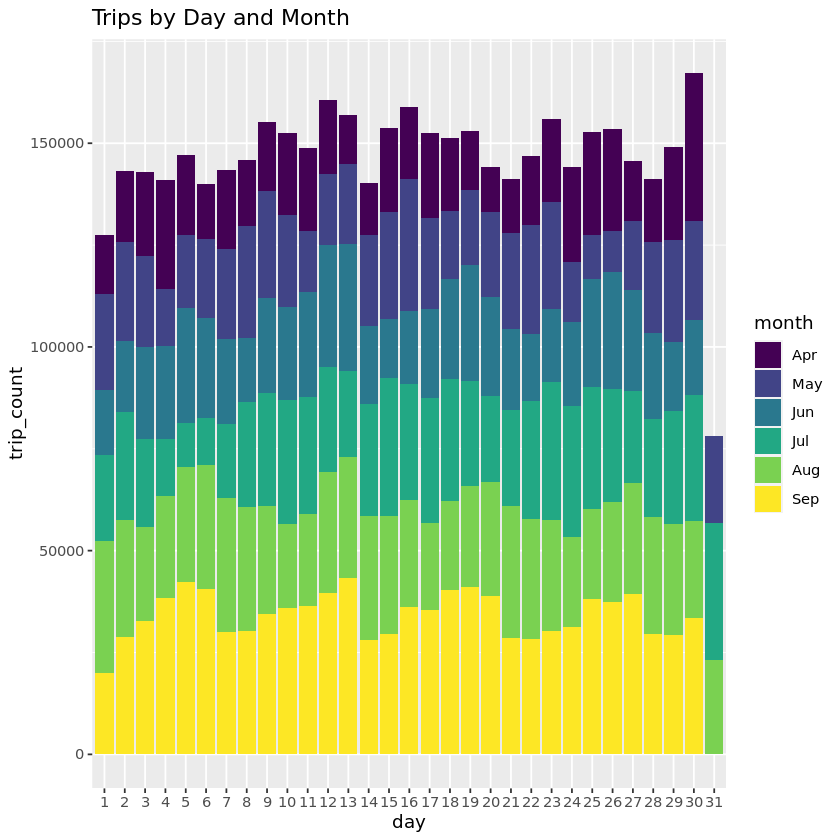

In [37]:
ggplot(month_day_data, aes(day, trip_count, fill = month)) + geom_bar(stat="identity") + ggtitle("Trips by Day and Month")

# Data Plotting

## Task 13: Plot the Heatmap

In [38]:
day_and_hour <- dataset %>% group_by(day, hour) %>% dplyr::summarize(trip_count = n())
month_base <-  dataset %>% group_by(Base, month) %>% dplyr::summarize(Total = n()) 

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Base'. You can override using the
`.groups` argument.


In [39]:
g1 <- ggplot(day_and_hour, aes(day, hour, fill = trip_count)) + geom_tile(color = "white") + ggtitle("Heat Map by Hour and Day")
g2 <- ggplot(month_day_data, aes(day, month, fill = trip_count)) + geom_tile(color = "white") + ggtitle("Heat Map by Month and Day")
g3 <- ggplot(month_base, aes(Base, month, fill = Total)) + geom_tile(color = "white") + ggtitle("Heat Map by Month and Bases")

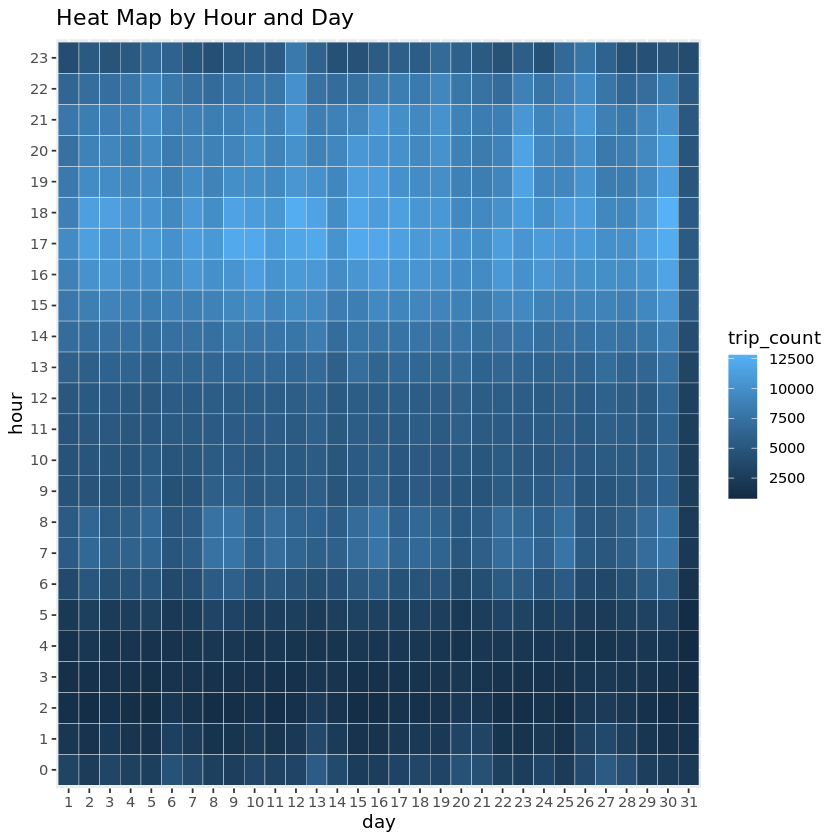

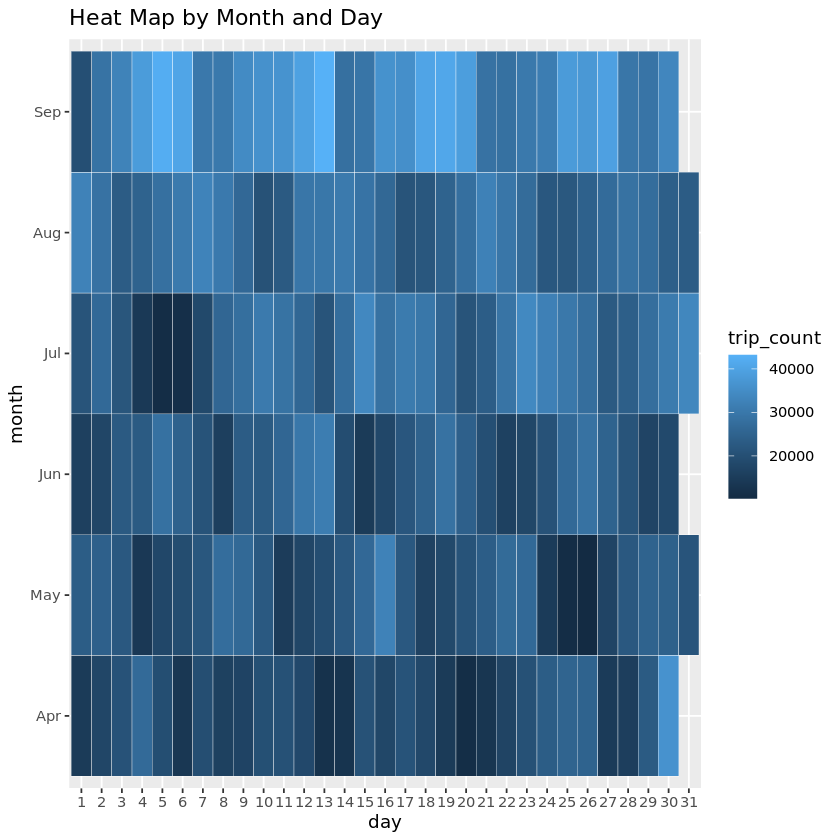

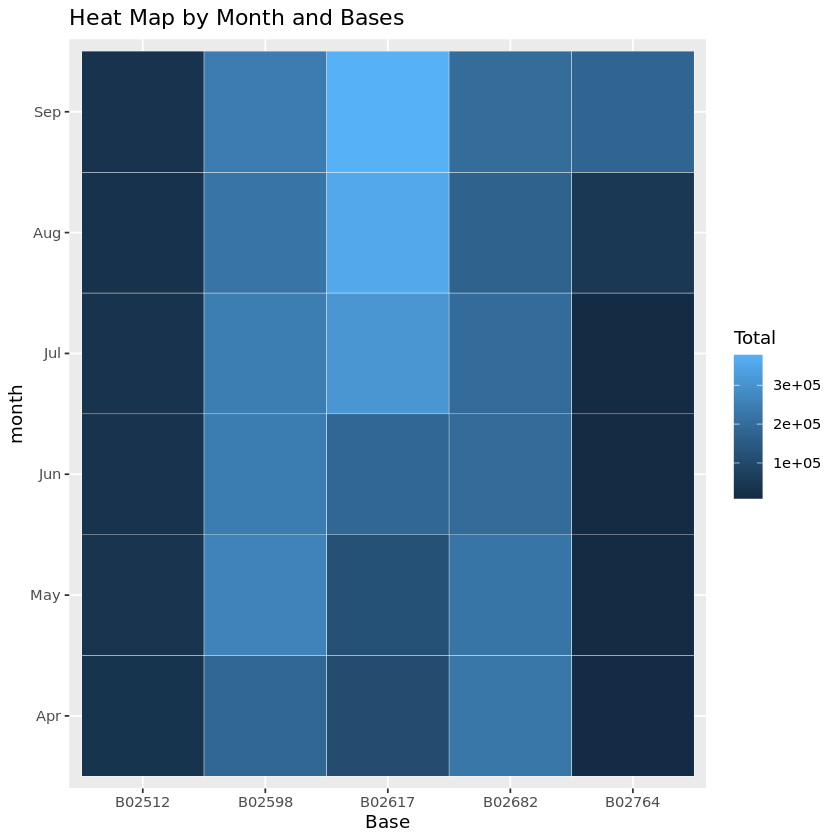

In [42]:
g1 
g2
g3

## Task 14: Visualize the rides in New York

In [43]:
min_lat <- min(dataset$Lat)
max_lat <- max(dataset$Lat)
min_long <- min(dataset$Lon)
max_long <- max(dataset$Lon)

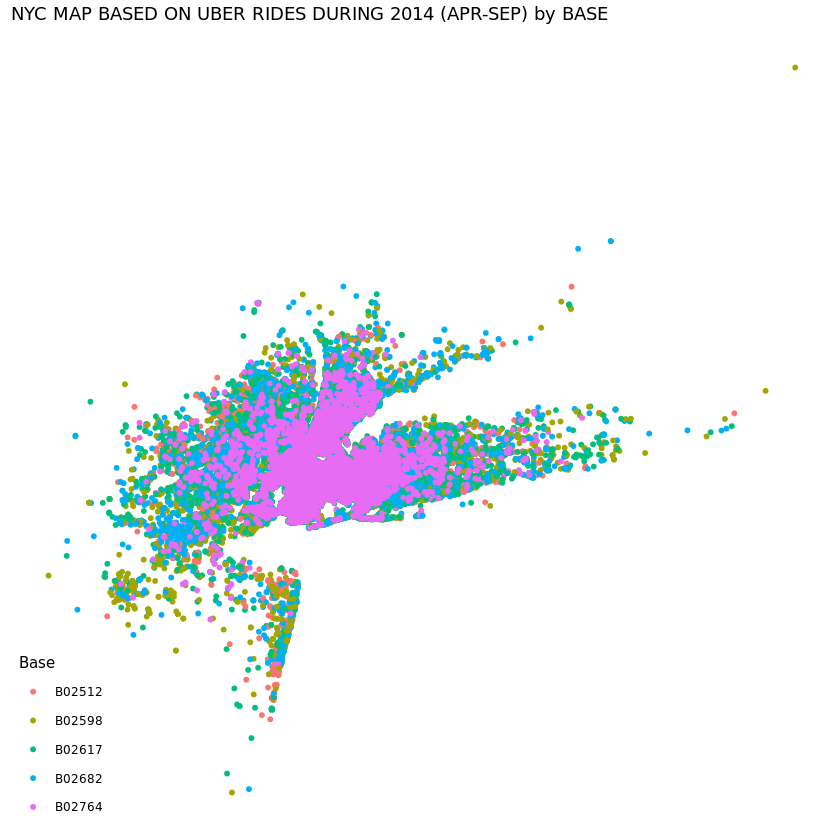

In [49]:
ggplot(dataset, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")